In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 逆变换采样

指数分布的概率密度为：
$f(x ; \lambda)=\lambda e^{-\lambda x}(x \geq 0)$

指数分布的累积分布函数是：
$$ 
y=F(x)=P(X \leq x)=\left\{\begin{array}{ll}{1-e^{-\lambda x},} & {x \geq 0} \\ {0,} & {x<0}\end{array}\right.
 $$
 
 指数分布的累计函数的反函数是：
 $$ 
x=F^{-1}(y)=-\frac{1}{\lambda} * \log (1-y)
 $$






In [2]:
def inverseSample(Lambda=2, maxCnt=50000):
    xs = []
    standardXaxis = []
    standardExp = []
    for i in range(maxCnt):
        y = np.random.uniform()
        x = -1 / Lambda * np.log(1 - y)
        xs.append(x)
        
    for i in range(1000):
        t = Lambda * np.exp(-Lambda * i / 100)
        standardXaxis.append(i / 100)
        standardExp.append(t)
    plt.plot(standardXaxis, standardExp, 'r')
    plt.hist(xs, 1000, density=True)
    plt.show()

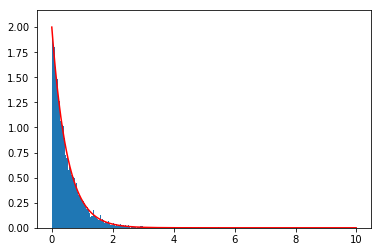

In [3]:
inverseSample()

# 接受/拒绝采样

对于目标分布$p(z)$,选取一个容易采样的参考分布$q(z)$,使得对于任意z都有$p ( z ) \leqslant k \cdot q ( z )$,则可以按如下过程采样:

- 从参考分布$q(z)$中随机抽取一个样本$z_i$
- 从均匀分布$U(0,1)$产生一个随机数$u_i$
- 如果$u _ { i } < \frac { p \left( z _ { i } \right) } { k q \left( z _ { i } \right) }$,则接受样本$z_i$;否则拒绝,重新进行步骤1~3,直到新产生的样本$z_i$被接受.

## 使用接受/拒绝采样模拟求$\pi$的值

我们在学习随机模拟的时候通常会讲到用采样的方法来计算π 值，也就是在一个1×1的范围内随机采样一个点，如果它到原点的距离小于1,则说明它在1/4圆内，则接受它，最后通过接受的占比来计算1/4圆形的面积，从而根据公式反算出预估的π值，随着采样点的增多，最后的结果 $\hat{\pi}$会越精准。


![替代文字](1.png)



这里的原理是，首先用采样模拟正方形里，1/4圆的面积s，此时根据圆的面积的公式，有$\pi 1^2 = 4s $

In [4]:
def samplePi(maxCnt=1000000):
    accCnt = 0
    for i in range(maxCnt):
        x = np.random.random()
        y = np.random.random()
        if np.sqrt(x ** 2 + y ** 2) < 1:
            accCnt += 1
    print("PI ~", float(accCnt) / maxCnt * 4)


In [5]:
samplePi(5000000)

PI ~ 3.1420432


## 一个接受/拒绝的例子

In [6]:
import scipy.stats as st
import seaborn as sns

In [7]:
sns.set()

In [8]:
def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)

In [9]:
def q(x):
    return st.norm.pdf(x, loc=50, scale=30)

In [10]:
x = np.arange(-50, 151)
k = max(p(x) / q(x))

In [11]:
def rejection_sample(maxCnt=10000):
    samples = []
    for i in range(maxCnt):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k * q(z))
        
        if u <= p(z):
            samples.append(z)
        
    return np.array(samples)

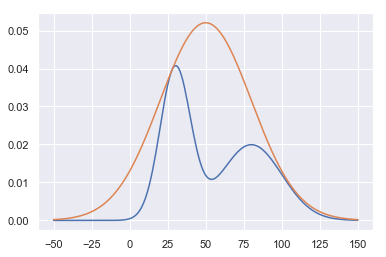

In [12]:
plt.plot(x, p(x))
plt.plot(x, k*q(x))
plt.show()

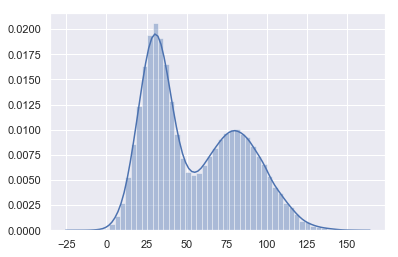

In [13]:
s = rejection_sample(maxCnt=100000)
sns.distplot(s)